<a href="https://colab.research.google.com/github/tarungangadhar/GridWorld/blob/main/OOPS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Created **"GridWorld"** which is defined by specific limits, centers and radii of circles. The idea is that in GridWorld is an N-dimensional space which is bound by some user defined limits (think of this as an N-dimensional box which you want to fit spheres into). The user enters the center and the radius of the N-dimensional spehere they would like to add to the GridWorld. The sphere can only be fit into GridWorld if:

1.   **Condition 1:** The sphere does not go outside the limits of the GridWorld, e.g a sphere cannot be fit into a 3D box if its to be placed outside the borders of the box.
2.   **Condition 2:** The sphere does not intersect with any other sphere in the box. Think of the sphere as a solid object, like a ball, and you're fitting it into a basket, if the area is already occupied by another ball the new ball cannot be placed!

---

In [13]:
class GridWorld():

  # The user will input limits of the world as an N-dimensional list.
  # We will store the centers in "circles" list and radii in "radii" list.
  # N will be the dimension of our GridWorld which can be simply extracted by checking the length of the limits vector.

  def __init__(self, limits):
    self.limits = limits
    self.radii = []
    self.circles = []
    self.N = len(limits)

  # Condition 1: We would like to make sure the sphere does not leave the limits.
  # The sphere could leave each dimension at one of the two sides.
  # Example in 2D the ball could leave in dimension 0 (from the right or the left side)
  # and from dimension 1 (from the top or the bottom)

  def condition1(self, radius, center):
    check_in_region = True
    for dimension in range(self.N):
      check_in_region = check_in_region and (center[dimension]+radius<= limits[dimension]) and (center[dimension]-radius>=0)
    print("The point is inside the limits : ", check_in_region)
    return check_in_region

  # Condition 2: We compute the squared euclidean distance between the centers of the new sphere to be added and the existing spheres.
  # If the distance is greater than the sum of the radii and condition 1 is satisfied then the sphere is valid.

  def condition2(self, center, old_center,radius,index):
    distance = 0
    check_distance = True
    for i in range(self.N):
      distance += (center[i]-old_center[i])**2
      sum_radius = (self.radii[index]+radius)**2
    check_distance = check_distance and (distance>=sum_radius)

    print(f"The sphere doesn't collapse with sphere {index}: ", check_distance)

    return check_distance


  # We now merge the conditions into place_sphere function which allows us to add a sphere into GridWorld.

  def place_sphere(self, center, radius):
    xflag= True

    if len(self.circles)==0:
      print('First circle therefore no collisions possible.')

    if not self.condition1(radius,center):
      xflag=False

    for i, circle in enumerate(self.circles):
      if not self.condition2(center,circle,radius,i):
        xflag=False

    if xflag:
      self.circles.append(center)
      self.radii.append(radius)
      print(f"Sphere of center {center} and radius {radius} has been successfully added!")
      print('*'*50)

    else:
      print("WARNING: Cannot Add Sphere")
      print('*'*50)



limits = [1,1]
circle = GridWorld(limits)
circle.place_sphere([0.5,0.5],0.1)
circle.place_sphere([0.15,0.15],0.15)
circle.place_sphere([0.35,0.25],0.05)
circle.place_sphere([0.7,0.7],0.2)

print(f"Spheres' Centers {circle.circles}")
print(f"Spheres' Radii {circle.radii}")



First circle therefore no collisions possible.
The point is inside the limits :  True
Sphere of center [0.5, 0.5] and radius 0.1 has been successfully added!
**************************************************
The point is inside the limits :  True
The sphere doesn't collapse with sphere 0:  True
Sphere of center [0.15, 0.15] and radius 0.15 has been successfully added!
**************************************************
The point is inside the limits :  True
The sphere doesn't collapse with sphere 0:  True
The sphere doesn't collapse with sphere 1:  True
Sphere of center [0.35, 0.25] and radius 0.05 has been successfully added!
**************************************************
The point is inside the limits :  True
The sphere doesn't collapse with sphere 0:  False
The sphere doesn't collapse with sphere 1:  True
The sphere doesn't collapse with sphere 2:  True
**************************************************
Spheres' Centers [[0.5, 0.5], [0.15, 0.15], [0.35, 0.25]]
Spheres' Radii [0.

(-0.045, 0.945, -0.045, 0.945)

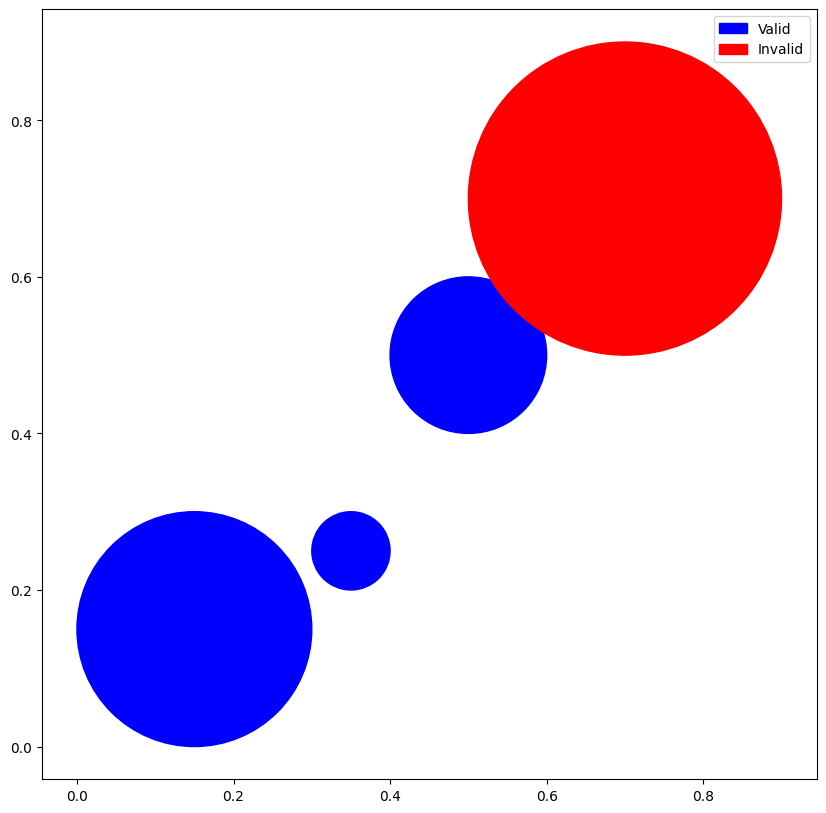

In [10]:
# Let's visualize the spheres we tried to add.

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,10)) # note we must use plt.subplots, not plt.subplot

ax.add_patch(plt.Circle((0.5,0.5), 0.1, color='b'))
ax.add_patch(plt.Circle((0.15,0.15), 0.15, color='b', label='Valid'))
ax.add_patch(plt.Circle((0.35,0.25), 0.05, color='b'))

ax.add_patch(plt.Circle((0.7,0.7), 0.2, color='r', label='Invalid'))



ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.legend()
plt.axis('equal')


In [11]:
# How about in 3D? Do a thought experiment and verify that the code works well!

limits = [1,1,1]
circle = GridWorld(limits)
circle.place_sphere([0.5,0.5,0.5],0.1)
circle.place_sphere([0.4,0.4,0.4],0.15)
circle.place_sphere([0.4,0.4,0.4],0.05)

print(f"Spheres' Centers {circle.circles}")
print(f"Spheres' Radii {circle.radii}")



First circle therefore no collisions possible.
The point is inside the limits :  True
Sphere of center [0.5, 0.5, 0.5] and radius 0.1 has been successfully added!
**************************************************
The point is inside the limits :  True
The sphere doesn't collapse with sphere 0:  False
**************************************************
The point is inside the limits :  True
The sphere doesn't collapse with sphere 0:  True
Sphere of center [0.4, 0.4, 0.4] and radius 0.05 has been successfully added!
**************************************************
Spheres' Centers [[0.5, 0.5, 0.5], [0.4, 0.4, 0.4]]
Spheres' Radii [0.1, 0.05]


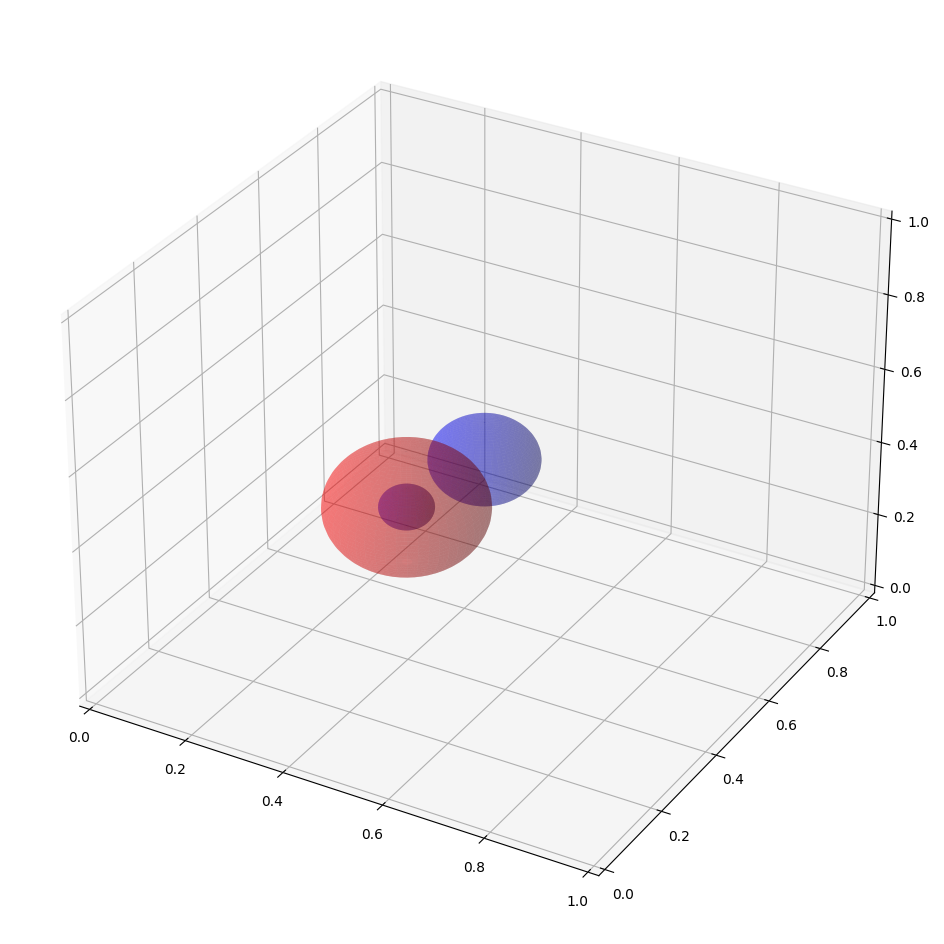

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

list_center = [(0.5,0.5,0.5),(0.4,0.4,0.4), (0.4,0.4,0.4)]
list_radius = [0.1,0.15,0.05]
validity = [True, False, True]
def plt_sphere(list_center, list_radius):
  counter = 0
  for c, r in zip(list_center, list_radius):
    # ax = fig.gca(projection='3d') # depending on your matplotlib version, you might want to uncomment this line and comment the one below, if you get an error
    ax = plt.subplot(projection='3d')

    # draw sphere
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x = r*np.cos(u)*np.sin(v)
    y = r*np.sin(u)*np.sin(v)
    z = r*np.cos(v)
    if validity[counter]:
      ax.plot_surface(x+c[0], y+c[1], z+c[2], color='b', alpha=0.3)
    else:
      ax.plot_surface(x+c[0], y+c[1], z+c[2], color='r', alpha=0.3)
    counter = counter+1
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_zlim(0,1)
  plt.show()

fig = plt.figure(figsize=(12,12))

plt_sphere(list_center, list_radius)
